# Assignments for "Main Statistical Concepts"

Please upload your solutions to the following assignments as Jupyter Notebook to your GitHub account and share the GitHub link with the button below. You can talk to your mentor about the issues you have in mind or ask Slack at office time.

1. By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

a) Draw the histogram and interpret

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
sta =pd.DataFrame([np.random.normal(100,10,10000)]).T
sta.columns =['Normal_distribution'] 
sta

,Normal_distribution
0,98.559895
1,106.867457
2,81.364883
3,118.947964
4,99.319193
...,...
9995,97.690625
9996,91.759487
9997,105.206658
9998,97.823181


Text(0, 0.5, 'Mean = 100, Std = 10')

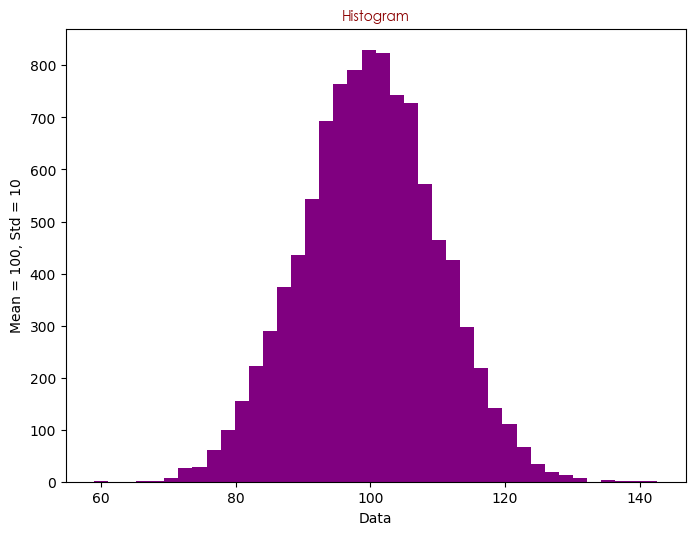

In [3]:
import warnings
warnings.filterwarnings('ignore')
title_style_small = {'family': 'Century Gothic', 'color': 'darkred', 'size': 10 }
axis_style_small  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 7 }

plt.figure(figsize=(8,6),dpi = 100)
plt.title('Histogram', fontdict = title_style_small)
plt.hist(sta['Normal_distribution'], color ="purple", bins =40)
plt.xlabel("Data")
plt.ylabel("Mean = 100, Std = 10")

   b) Draw Q-Q plot and interpret

In [4]:
s = sta.to_numpy()
s

array([[ 98.55989507],
       [106.86745704],
       [ 81.36488291],
       ...,
       [105.20665801],
       [ 97.82318066],
       [ 92.21502816]])

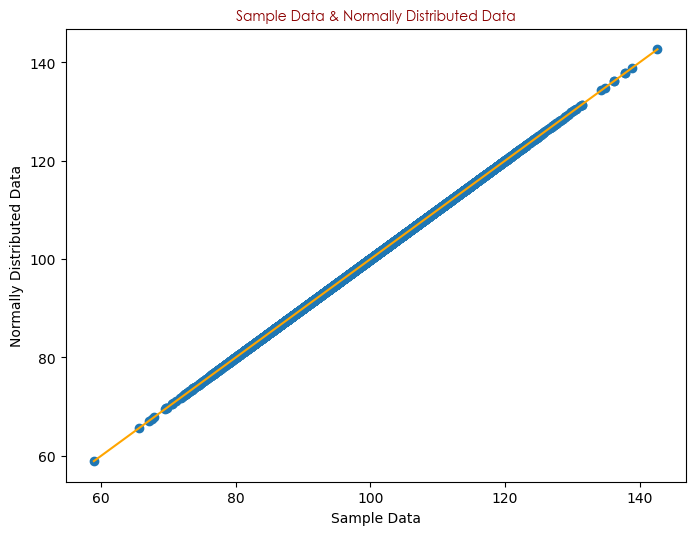

In [5]:
s.sort()

title_style_small = {'family': 'Century Gothic', 'color': 'darkred', 'size': 10 }
axis_style_small  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 7 }

plt.figure(figsize=(8,6),dpi = 100)

plt.title('Sample Data & Normally Distributed Data', fontdict = title_style_small)
plt.xlabel('Sample Data')
plt.ylabel('Normally Distributed Data')
plt.scatter(s,s)
plt.plot([np.min(s), np.max(s)],
         [np.min(s), np.max(s)], c='orange')

plt.show()

2. Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [6]:
import datetime
import yfinance as yf
import scipy.stats as stats
import warnings
import pylab
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd

[*********************100%***********************]  1 of 1 completed


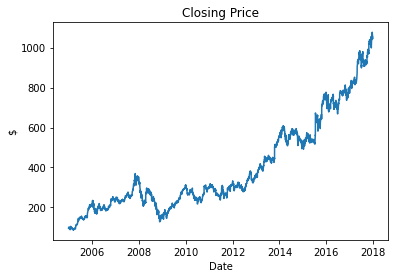

In [7]:
stock='GOOG'
start=datetime.datetime(2005,1,1)
end=datetime.datetime(2018,1,1)
gog=yf.download(stock,start=start,end=end,interval='1d')

plt.plot(gog.Close)
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

In [8]:
gog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,99.243011,99.566803,95.920464,96.035034,96.035034,15394400
2005-01-03,98.331429,101.439781,97.365051,100.976517,100.976517,31807000
2005-01-04,100.323959,101.086105,96.378746,96.886841,96.886841,27614900
2005-01-05,96.363808,98.082367,95.756081,96.393692,96.393692,16534800
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20851900


In [9]:
gog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2004-12-31 to 2017-12-29
Data columns (total 6 columns):
Open         3273 non-null float64
High         3273 non-null float64
Low          3273 non-null float64
Close        3273 non-null float64
Adj Close    3273 non-null float64
Volume       3273 non-null int64
dtypes: float64(5), int64(1)
memory usage: 179.0 KB


In [10]:
gog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3273.000000,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03
mean,399.963214,403.391739,396.176046,399.854674,399.854674,7.619330e+06
std,233.206520,234.440340,231.884090,233.295025,233.295025,8.012194e+06
min,87.322693,88.866905,85.962791,87.168274,87.168274,7.900000e+03
25%,233.360306,235.621826,230.645477,233.141129,233.141129,2.370400e+06
50%,299.527313,302.366669,297.235901,299.372864,299.372864,5.034700e+06
75%,548.494080,553.191223,542.560425,548.558838,548.558838,9.973800e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,8.254150e+07


In [11]:
Pt1=gog[gog.index==gog.index[0]].Close
Pt=gog[gog.index==gog.index[-1]].Close
stock=(Pt.values[0]-Pt1.values[0])/Pt1.values[0]

print("Google stock at 2015-2017 {}".format(stock))

Google stock at 2015-2017 9.8960238662089
